In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./goodData/amos0313.csv')
print(data.columns)
data['TEMP'] = (data['TEMP (C)'] - data['TEMP (C)'].min()) / (data['TEMP (C)'].max() - data['TEMP (C)'].min()) * 100
data['DEWPOINT'] =( data['DEWPOINT (C)'] - data['DEWPOINT (C)'].min()) / (data['DEWPOINT (C)'].max() - data['DEWPOINT (C)'].min()) * 100
data['WS2A'] = (data['WS2A (MPS)_mean'] - data['WS2A (MPS)_mean'].min()) / (data['WS2A (MPS)_mean'].max() - data['WS2A (MPS)_mean'].min()) * 100
data['MOR_1A'] = data['MOR_1A'].apply(lambda x: 5000 if x >= 5000 else x)
plt.plot(data['MOR_1A'])
plt.plot(data['RVR_1A'])

data['MOR'] = (data['MOR_1A'] - data['MOR_1A'].min()) / (data['MOR_1A'].max() - data['MOR_1A'].min()) * 100

Index(['CREATEDATE', 'LOCALDATE (BEIJING)', 'PAINS (HPA)', 'TEMP (C)',
       'DEWPOINT (C)', 'LIGHTS', 'WS2A (MPS)', 'WD2A', 'CW2A (MPS)', 'RVR_1A',
       'RVR_10A', 'RVR1M', 'RVR_10M', 'MOR_1A', 'MOR_10A', 'MOR_10M',
       'MOR_10X', 'year', 'month', 'day', 'hour', 'minute', 'WS2A (MPS)_mean',
       'QFE R06 (HPA)', 'QFE R24 (HPA)', 'QNH AERODROME (HPA)', 'RH (%)'],
      dtype='object')


In [3]:
data.describe()['MOR_1A']

count    1440.000000
mean     2661.736111
std      2034.089542
min         0.000000
25%        50.000000
50%      3200.000000
75%      5000.000000
max      5000.000000
Name: MOR_1A, dtype: float64

In [4]:
useful = ['WS2A', 'QFE R06 (HPA)', 'RH (%)', 'TEMP', 'DEWPOINT','MOR']

In [5]:
da = data[useful]

In [6]:
da.head(10)

,WS2A,QFE R06 (HPA),RH (%),TEMP,DEWPOINT,MOR
0,58.560311,53.75,76.923077,15.322581,37.416481,60.0
1,58.560311,55.00,76.923077,16.129032,38.530067,62.0
2,58.560311,55.00,75.384615,16.129032,36.525612,62.0
3,58.560311,56.25,75.384615,16.935484,37.639198,62.0
4,58.560311,56.25,75.384615,16.935484,37.639198,62.0
5,58.560311,56.25,75.384615,17.741935,38.752784,62.0
6,58.560311,56.25,73.846154,17.741935,36.859688,60.0
7,58.560311,56.25,75.384615,18.548387,39.866370,62.0
8,58.560311,56.25,75.384615,19.354839,40.979955,62.0
9,58.560311,55.00,73.846154,19.354839,38.975501,62.0


In [7]:
da.describe()

,WS2A,QFE R06 (HPA),RH (%),TEMP,DEWPOINT,MOR
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,40.980574,48.726562,65.000000,45.605959,51.434206,53.234722
std,32.149986,24.616775,38.674537,33.554451,25.397789,40.681791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.468223,22.500000,18.461538,14.516129,32.989978,1.000000
50%,33.109303,55.000000,83.076923,41.935484,51.670379,64.000000
75%,69.070570,66.250000,100.000000,82.459677,73.942094,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


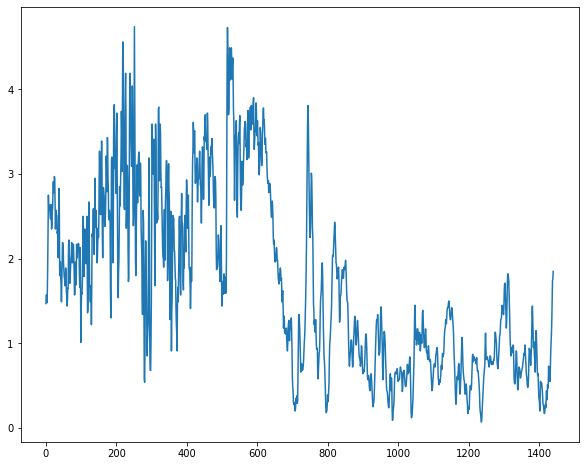

In [8]:
data.columns
plt.figure(figsize=(10, 8))
plt.plot(data['WS2A (MPS)'])

<AxesSubplot:>

<Figure size 3000x1500 with 0 Axes>

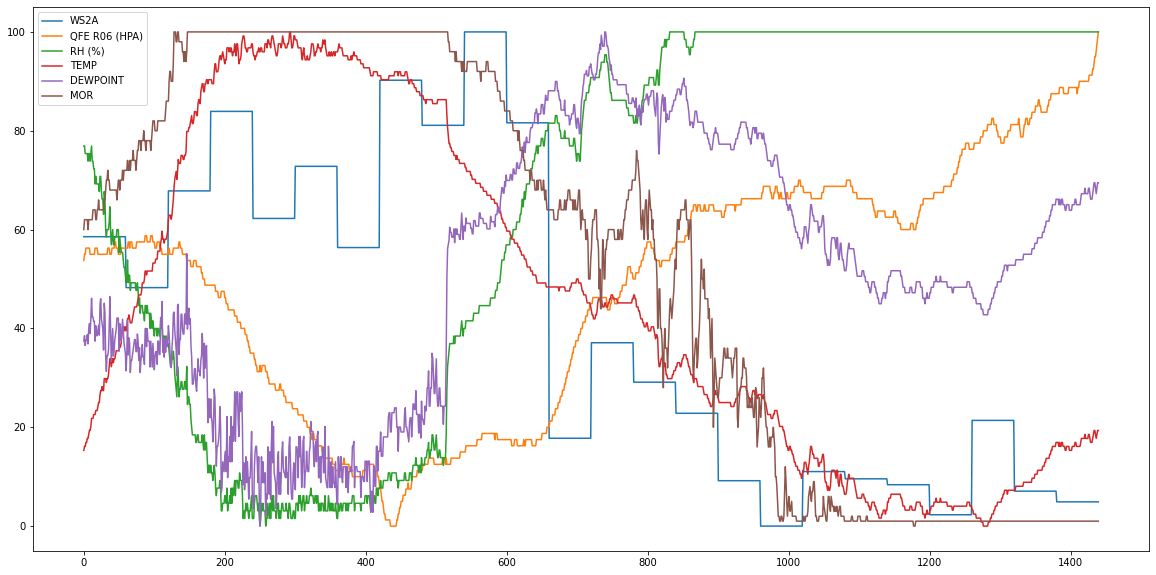

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi=300)
da.plot(figsize=(20, 10))

In [10]:
feature = useful[:-1]

target = useful[-1]
useful


['WS2A', 'QFE R06 (HPA)', 'RH (%)', 'TEMP', 'DEWPOINT', 'MOR']

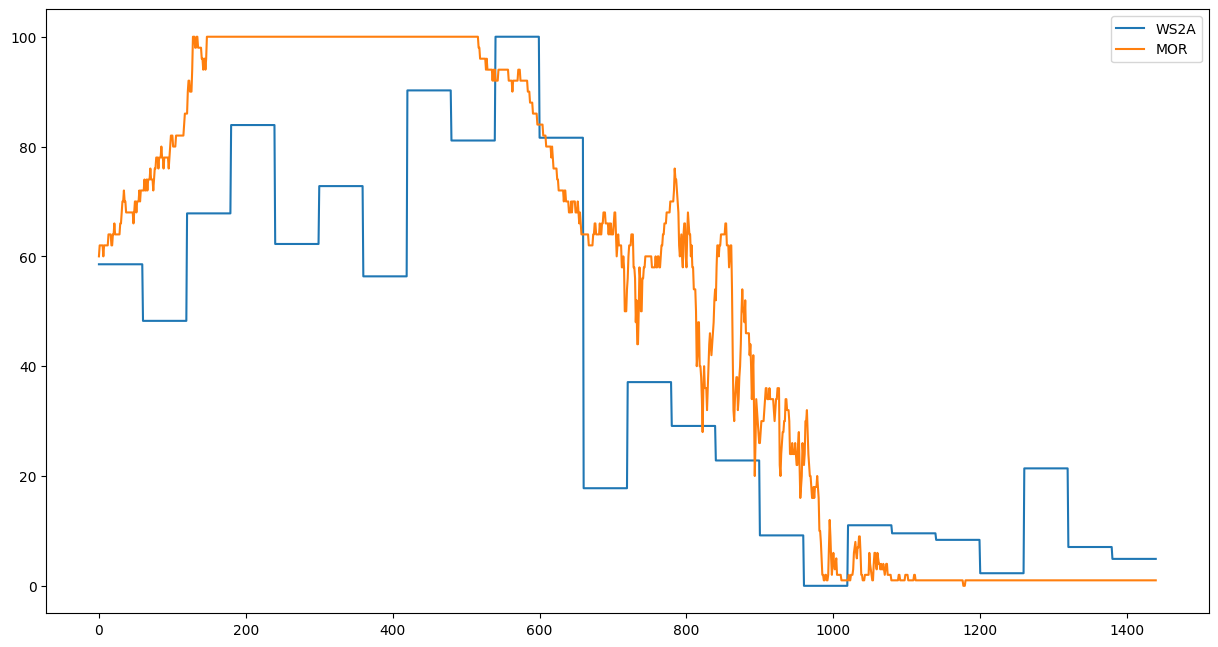

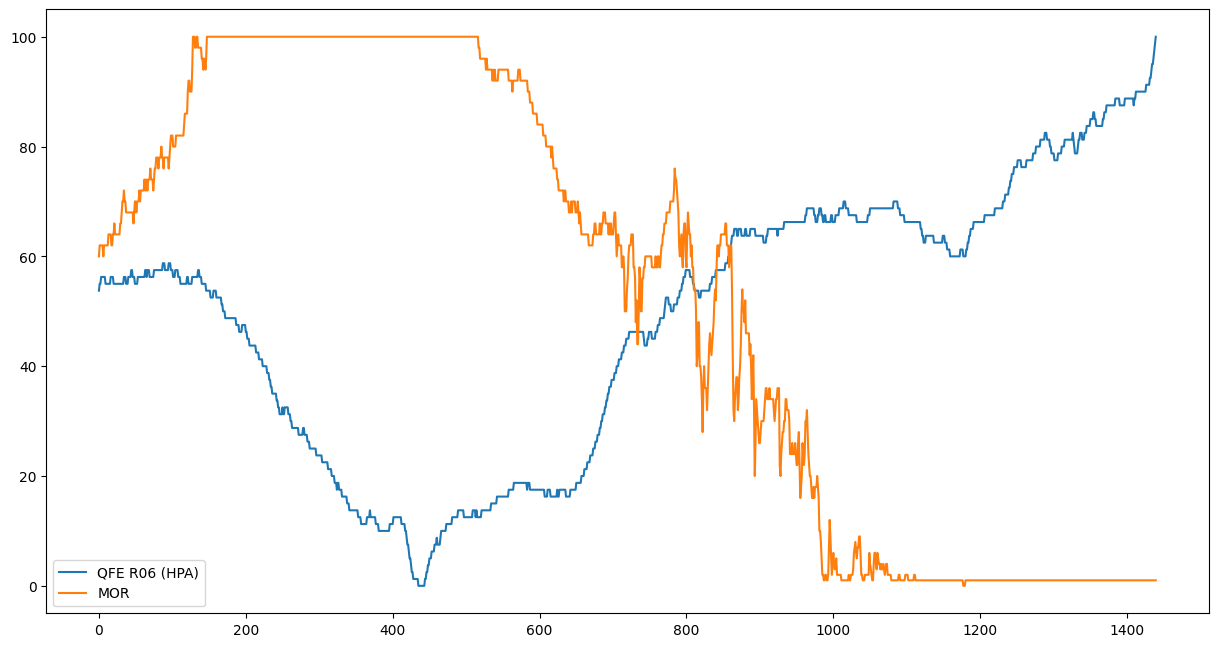

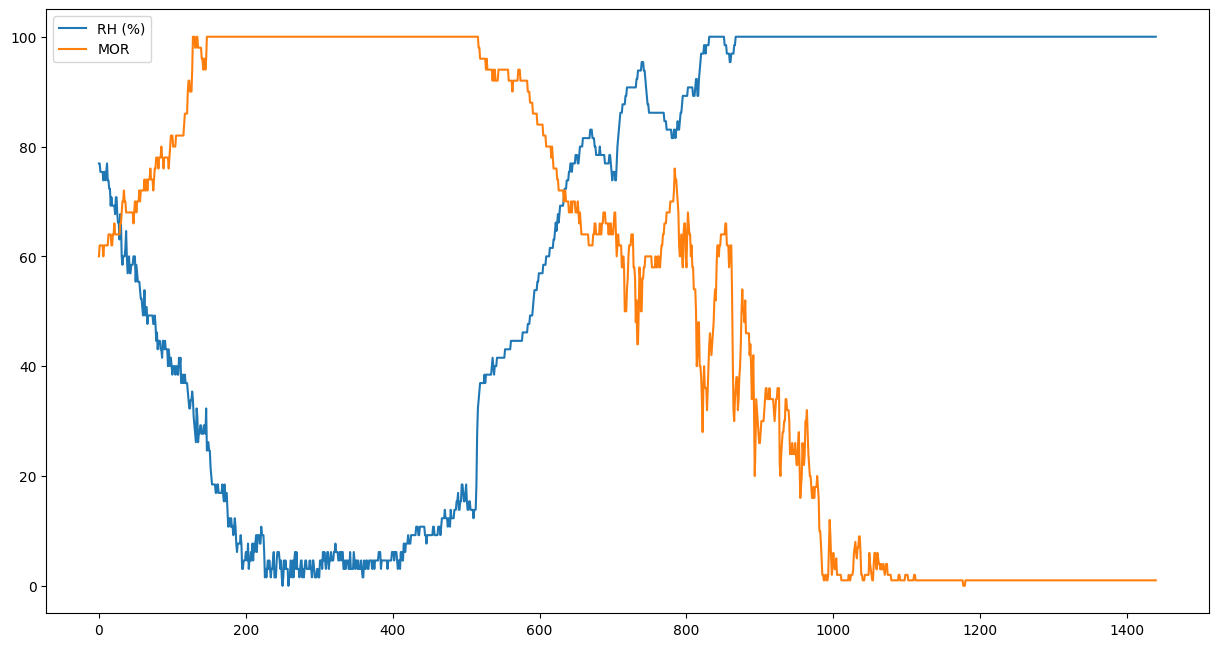

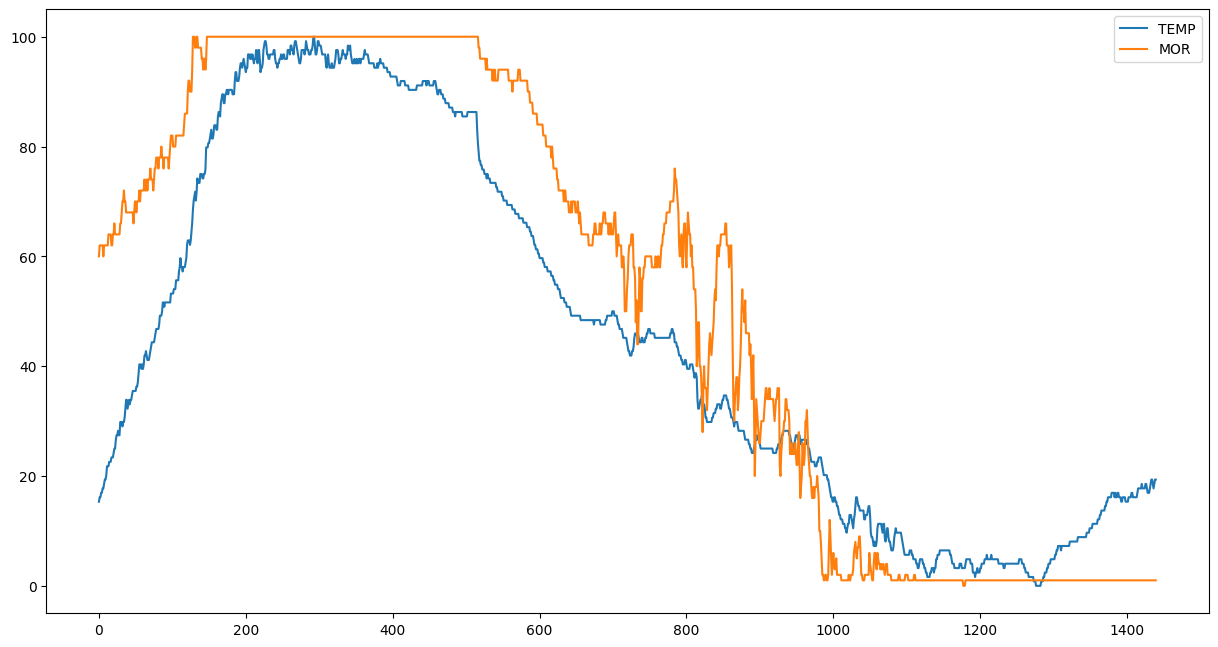

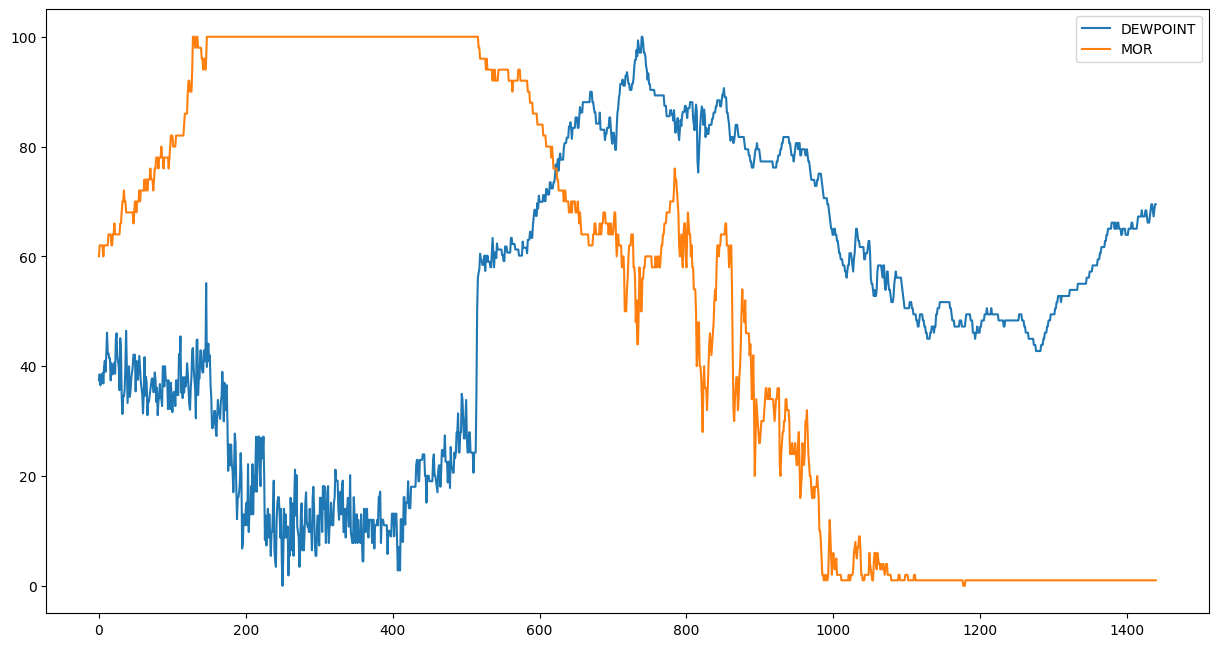

In [11]:
def plotFig(feat):
    plt.figure(figsize=(15, 8), dpi=100)
    line1, = plt.plot(da[feat].to_list())
    line2, = plt.plot(da[target])
    plt.legend(handles=[line1, line2], labels=[feat, target], loc='best')
    plt.show()
for feat in useful[:-1]:
    plotFig(feat)

In [13]:
da.to_csv('./goodData/amos0313_last.csv'
         )

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

da2 = pd.read_csv('./cssdata.csv')
da2 = da2.T
da2 = scale(da2.values)
pca = PCA(30)
pca.fit(da2)

featureRoot = pca.explained_variance_
ratio = pca.explained_variance_
zhuchengfen = pca.components_
# print(pca.explained_variance_) # 输出特征根
# print(pca.explained_variance_ratio_) # 输出解释方差比
# print(pca.components_) # 输出主成分

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
featureRoot.shape

In [ ]:
np.savetxt("new.csv", zhuchengfen, delimiter=',')

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
#X为样本特征，Y为样本簇类别， 共1000个样本，每个样本3个特征，共4个簇
X, y = make_blobs(n_samples=10000, n_features=3, centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], cluster_std=[0.2, 0.1, 0.2, 0.2], 
                  random_state =9)

In [118]:
X.shape

(10000, 3)